## Lesson 3 - Neural net foundations

[FAQ, resources and official course updates](https://forums.fast.ai/t/faq-resources-and-official-course-updates/95292)

Lecture summary:

* Recommend to watch [Lessson 0](https://www.youtube.com/watch?v=gGxe2mN3kAg)  for "how to fast.ai".    Note that "Lesson 0" is quite old (2020 is old now!) and some of the last stuff at the end (the stuff about using AWS EC2) refers to documents that fast.ai doesn't provide anymore as far as I can tell. 

* Review of student work.

* Introduction of Paperspace Gradient

   - Note that I use this, it is not really the best anymore since Digital Ocean bought them though. [Downtime](https://status.paperspace.com/) is more frequent then i would like, and machine startup can be SLOW.
   - Best feature is the ability to use the remote desktop.
   - You can use jupyter lab through there.

* Improving pet classifier by using other models- `timm` module has many models you can try. If you use timm, just use the model name as a string in `vision_learner`.

* fast.ai stores categories in `dls.vocab` 

### Look at the model!

In [1]:
from fastai.vision.all import *

# need the is cat function!
def is_cat(x): return x[0].isupper()

learn = load_learner('model.pkl')
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Layers upon layers ! *Deep* learning.

In [2]:
l = learn.model.get_submodule('0.1')   # this is a BatchNorm2d layer
l

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [3]:
list(l.parameters())  # parameters is a generator, so we convert it to a list

[Parameter containing:
 tensor([ 2.3446e-01,  2.6621e-01, -5.1096e-08,  5.1795e-01,  3.4404e-09,
          2.2224e-01,  4.2251e-01,  1.3153e-07,  2.5180e-01,  1.5152e-06,
          3.1656e-01,  2.4947e-01,  3.7797e-01,  1.0862e-05,  2.7471e-01,
          2.3831e-01,  2.4306e-01,  3.9593e-01,  4.7155e-01,  2.9069e-01,
          2.7300e-01,  2.7844e-01,  2.9069e-01,  2.0527e-01,  2.6012e-01,
          2.7987e-01,  2.9207e-01,  3.1485e-01,  3.8960e-01,  3.0314e-01,
          2.6662e-01,  2.1045e-01,  2.8660e-01,  3.3190e-01,  4.2864e-01,
          3.7165e-01,  7.4804e-08,  1.9039e-01,  1.4740e-08,  2.2395e-01,
          1.8058e-01,  2.4862e-01,  2.7337e-01,  2.5842e-01,  2.9521e-01,
          2.9983e-01,  2.2335e-01,  2.6272e-01,  2.2001e-08,  2.6464e-01,
          2.1989e-01,  2.8322e-01,  3.2972e-01,  2.2612e-01,  3.6701e-01,
          2.1193e-01,  2.3936e-01,  2.5123e-01,  5.2742e-01,  2.4820e-01,
          2.9512e-01,  2.5859e-01,  4.8475e-01,  2.6641e-01],
        requires_grad=True)

### How does a neural network really work?
[Video: 23.51](https://youtu.be/hBBOjCiFcuo?t=1431)

[Kaggle notebook](https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work)

Aside: `@interact` is really cool!   [Documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

The notebook above shows how gradient descent can help fit a function (using torch autograd on a quadratic function) and also discusses the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).   

In [4]:
from ipywidgets import interact

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100,dtype= torch.double)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [5]:
import torch.nn.functional as F
def rectified_linear(m,b,x): return F.relu(m*x+b)

def triple_relu(m1,b1,m2,b2,m3,b3,x):


    return rectified_linear(m3,b3,x)+rectified_linear(m2,b2,x) +  rectified_linear(m1,b1,x)

In [6]:
@interact(m1=-1.5, b1=0.6, m2=1.5, b2=2.2,  m3 =0.4, b3 =0.6)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
    plot_function(partial(triple_relu, m1,b1,m2,b2,m3,b3), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=0.6, des…

   ### Aside  - fit Relus to the data
   
   Note that we could also vary the coefficients in front of each term as well as add an offset, 
   which is needed to get full flexibility and is what a simple single hidden layer neural network would look like.


In [7]:
# simple single hidden layer network with 3 hidden units:
class NN(nn.Module):
    def __init__(self, hidden_units = 3):
        super().__init__()
        self.hidden = nn.Linear(1,hidden_units,dtype = torch.float64)
        self.output = nn.Linear(hidden_units,1, dtype = torch.float64)
    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))
    
model = NN(3)
list(model.parameters())

[Parameter containing:
 tensor([[0.6628],
         [0.4938],
         [0.6088]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([ 0.2005,  0.1466, -0.1231], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([[-0.2794,  0.5231,  0.1596]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.1182], dtype=torch.float64, requires_grad=True)]

In [8]:
[model.hidden.weight, model.hidden.bias]

[Parameter containing:
 tensor([[0.6628],
         [0.4938],
         [0.6088]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([ 0.2005,  0.1466, -0.1231], dtype=torch.float64, requires_grad=True)]

The parameters of the hidden layer are the three `m` and `b` variables we had before, but we can combine the three units in any linear combination, which are the paramters of the output layer

In [9]:
[model.output.weight, model.output.bias]

[Parameter containing:
 tensor([[-0.2794,  0.5231,  0.1596]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.1182], dtype=torch.float64, requires_grad=True)]

For fun lets fit this to that noisy quadratic

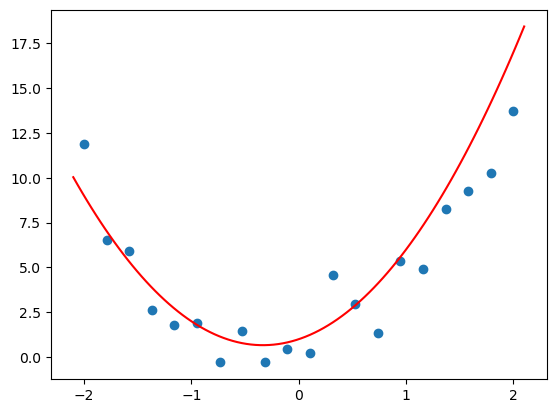

In [10]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
np.random.seed(42)

def f(x): return 3*x**2 + 2*x +1 

x = torch.linspace(-2, 2, steps=20, dtype=torch.double)[:,None]
y = add_noise(f(x), 0.15, 1.5)

plt.scatter(x, y)
plot_function(f)

In [11]:
def fit_model(model, nsteps = 40):
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    for i in range(nsteps): 
        loss = loss_fn(model(x), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0: print(loss.item())


In [12]:
model= NN(3)
fit_model(model, 600)

47.36396886638256
9.209096470278046
8.361102156994345
7.811543311356732
7.570762348691571
7.553480520003461


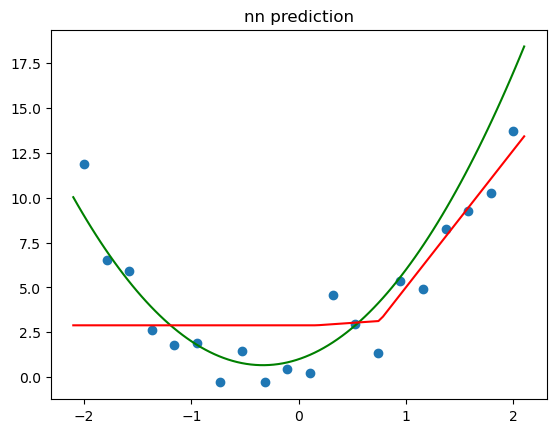

In [13]:
# plot the model's predictions
plt.scatter(x, y)
plot_function(f, color='g')
def predict(x): return model(x).detach()
plot_function(predict, "nn prediction")
 


more units, fits data better (but doesn't know about quadratic model! )

38.56544549063932
2.761671614744165
2.083542920494396
1.8749918182446739
1.6820421426933845
1.5415076765116713


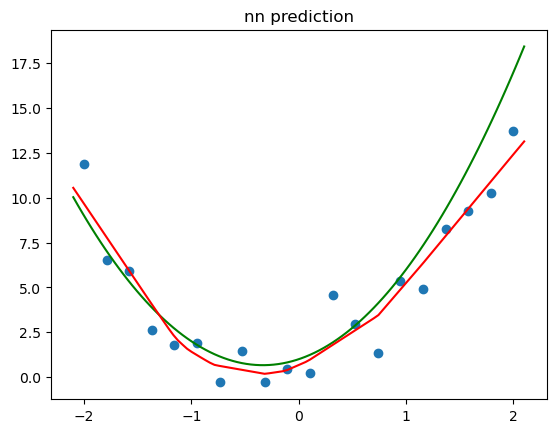

In [14]:
model= NN(30)
fit_model(model, 600)
plt.scatter(x, y)
plot_function(f, color='g')
def predict(x): return model(x).detach()
plot_function(predict, "nn prediction")

### Regression in a spreadsheet

* Jeremy spends some time explaining matrix multiplciation (around 1:00 in the video)

* Then implements a machine learning model in a spreadsheet using the Kaggle [titanic](https://www.kaggle.com/c/titanic) data set.  For fun I am going to try to do the same thing using pandas.

In [15]:
import pandas as pd
import numpy as np

In [16]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin'], inplace=True)
titanic.dropna(inplace=True)
# create dummies for the categorical variables C, S Male, and pclass
titanic = pd.get_dummies(titanic, columns = ['Sex','Embarked','Pclass'])
titanic.drop(columns = ["Sex_female", "Embarked_Q", "Pclass_3"], inplace=True)

# Rescale the Age and Fare columns
titanic['Age_Scaled'] = titanic['Age']/titanic['Age'].max()
titanic['Log_Fair'] = np.log(titanic['Fare']+1) # code smell... 
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_2,Age_Scaled,Log_Fair
0,0,22.0,1,0,7.2500,True,False,True,False,False,0.2750,2.110213
1,1,38.0,1,0,71.2833,False,True,False,True,False,0.4750,4.280593
2,1,26.0,0,0,7.9250,False,False,True,False,False,0.3250,2.188856
3,1,35.0,1,0,53.1000,False,False,True,True,False,0.4375,3.990834
4,0,35.0,0,0,8.0500,True,False,True,False,False,0.4375,2.202765


In [17]:
# Extract the independent variables and the dependent variable
X = titanic.drop(columns = ['Survived', 'Age','Fare']).to_numpy(dtype = np.float32)
# append column of 1's for intercept
X = np.hstack([X, np.ones((X.shape[0],1))])
y = titanic['Survived'].to_numpy(dtype = np.float32)



We will use compute log odds as `X@params` , so the prediction function looks like this:

In [18]:
def predict(params, X):
    return 1/(1+np.exp(-X @ params))

In [19]:
# compute initial accuracy on *training* data
params = np.random.randn(X.shape[1])
np.mean((predict(params, X) > 0.5) == y)

0.5758426966292135

As a baseline, let's consider predicting only based on sex. If you are female, you survive, male you dont.

In [38]:
titanic.groupby('Sex_male')['Survived'].mean()

Sex_male
False    0.752896
True     0.205298
Name: Survived, dtype: float64

In [40]:
np.mean(titanic['Survived']== (1-titanic['Sex_male']))

0.7794943820224719

So our model has to do better then this 'baseline'

In [20]:

def loss(params):
    logits = X @ params
    # logistic loss
    return np.sum(np.log(1+np.exp((1-2*y)*logits)))

loss(params)
 

602.3089875493151

verify reduced formula

In [21]:
-np.sum(y*np.log(predict(params,X)) + (1-y)*np.log(1-predict(params,X)))

602.3089875493151

Now we need to minimize this... let's use scipy.optimize which is I beleive is close to what excel does. This uses numerical gradients

In [22]:
from scipy.optimize import minimize
res = minimize(loss, params, method='BFGS')
loss(res.x)

315.9709365276931

In [23]:
# compute accuracy, NOTE this is on the training set, we are not doing a proper train/val split. 
np.mean((predict(res.x, X) > 0.5) == y)


0.7991573033707865

This is as good as logistic regression can do here, and it is better then baseline, but not by alot!

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.7949438202247191

Ok now lets try to do the double linear regression with RELU's.  In the spreadsheet he only added the two linear models, but really they should ba added in arbitray linear combinations as well.

The function below will create as many hidden units as columns in params 

In [25]:
# initial parameters for the hidden units:
params = np.random.randn(X.shape[1],2)
params

array([[ 0.32408397, -0.38508228],
       [-0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012],
       [-0.83921752, -0.30921238],
       [ 0.33126343,  0.97554513],
       [-0.47917424, -0.18565898],
       [-1.10633497, -1.19620662],
       [ 0.81252582,  1.35624003],
       [-0.07201012,  1.0035329 ],
       [ 0.36163603, -0.64511975]])

In [26]:
# output parameters, in the spreadsheet these are fixed to 1,1 0
output_params = np.random.randn(3)

In [27]:
def nnet_model(params, output_params, X):
    assert(params.shape[0] == X.shape[1])
    assert(output_params.shape[0] == params.shape[1] + 1)  # one extra for biase
    # first layer
    hidden = X @ params
    # relu
    hidden = np.maximum(hidden, 0)
    # output layer
    output = hidden @ output_params[:-1]+output_params[-1]
    return output

In [28]:
# define loss and prediction functions
def nn_loss(params, output_params):
    logits = nnet_model(params, output_params, X)
    return np.sum(np.log(1+np.exp((1-2*y)*logits)))

def nn_predict(params, output_params, X):
    return 1/(1+np.exp(-nnet_model(params, output_params, X)))

Initial score on random

In [29]:
np.mean((nn_predict(params,output_params, X) > 0.5) == y)

0.4044943820224719

scipy optimize requires all the parameters in a flatt row.

In [30]:
def unflatten_params(flat_params, num_hidden_units=2):
    n_params = X.shape[1]*(num_hidden_units)
    params = flat_params[:n_params].reshape(X.shape[1],num_hidden_units)
    output_params = flat_params[n_params:]
    return params, output_params

In [31]:
def nn_loss_flat(flat_params, num_hidden_units = 2  ):
    params, output_params = unflatten_params(flat_params, num_hidden_units)
    return nn_loss(params, output_params)

In [32]:
flat_params =np.concatenate([params.flatten(),output_params])
nn_loss_flat(flat_params)

2762.26036824734

In [33]:
res = minimize(nn_loss_flat, flat_params, method='BFGS')
nn_loss_flat(res.x)

302.41629210357473

In [34]:
np.mean((nn_predict(*unflatten_params(res.x), X) > 0.5) == y)

0.8146067415730337

Ok, so a bit better then one hidden unit. Obvious thing to do is to add more hidden units, but then we should switch to pytorch, as well as use a proper train/val split.  


### Getting started with NLP

Next section is NLP, and Jeremy recommends first going through the ["Getting Started with NLP for absolute beginners"](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners)

### Notes on reading Chapter 4

Part of chapter 4 (dealing with fitting the quadratic) was covered in the lesson, but I believe the second part is coming in a later lesson. However for future reference, it is important to note that PyTorch has moved on a bit since that chapter was written, for example the `data` attribute is not used any more (instead use `pytorch.no_grad`)
